w = [551962.98744449 -52735.68843047  44874.28402995 124682.12945012
 -24796.91330001  21414.82603335  29988.22256868  35577.62264663
  21570.85285171 113746.01732472  47456.65858236 -70697.94145716
   6446.18451947]


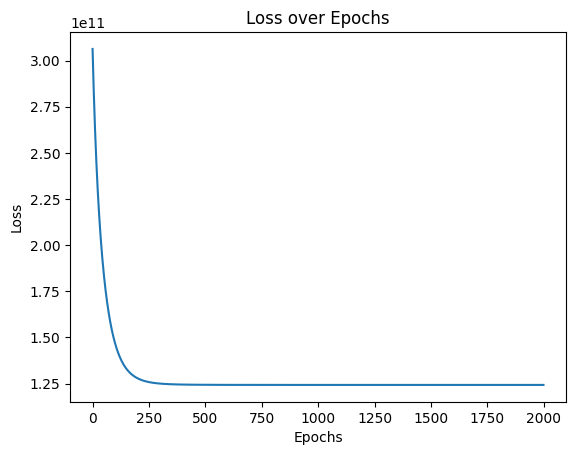

Giá dự đoán: [359493.82550785]


In [ ]:
# Huấn luyện sử dụng chuẩn hóa
import numpy as np
import matplotlib.pyplot as plt

# ---------- Chuẩn hóa ----------
def add_bias(X):
    # thêm cột 1 ở đầu cho bias (w0)
    return np.c_[np.ones((X.shape[0], 1)), X]

def standardize(X):
    # chuẩn hoá Z-score: (x - mean)/std
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    sigma[sigma == 0.0] = 1.0  # tránh chia 0
    return (X - mu) / sigma, mu, sigma

def loss_mse(Xb, y, w):
    N = len(y)
    y_pred = Xb @ w
    return np.sum((y_pred - y) ** 2) / (2 * N)

def gradientDescent_multi(X, y, lr=0.01, epochs=2000):
    # chuẩn hoá feature để dễ hội tụ
    Xn, mu, sigma = standardize(X)
    Xb = add_bias(Xn)                   #(N, d+1)
    N, d1 = Xb.shape

    # khởi tạo w
    w = np.zeros(d1)
    losses = []

    for _ in range(epochs):
        y_pred = Xb @ w
        grad = (Xb.T @ (y_pred - y)) / N   #gradient
        w -= lr * grad
        losses.append(loss_mse(Xb, y, w))

    return w, losses, mu, sigma


 #   Khai tác dữ liệu từ file csv

import pandas as pd

df = pd.read_csv(r"D:\Scr-AIR\Buoi1\data.csv")

#lượt bỏ date và các thông tin có dạng text 
X = df.drop(['price', 'date', 'street', 'city', 'statezip', 'country'], axis=1).to_numpy()
Y = df['price'].to_numpy()

# huấn luyện
w, losses, mu, sigma = gradientDescent_multi(X, Y, lr=0.01, epochs=2000)
print('w =', w)

# vẽ đồ thị hàm mất mát
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

# mẫu dũ đoán giá nhà
# X_new = np.array([[3, 1.5, 1340, 7912,  1.5, 0, 0, 3, 1340, 0, 1955, 2005]])
# X_new_b = np.c_[np.ones((1,1)), X_new]   # thêm bias = 1
# X_new_n = (X_new - mu) / sigma
# X_new_b = np.c_[np.ones((X_new_n.shape[0], 1)), X_new_n]
# grads = X_new_b @ w
# print("Giá dự đoán:", grads)


w = [1.41581840e-03 5.08655178e-03 3.44489442e-03 3.61884484e+00
 5.86823752e+00 2.27577030e-03 2.86983420e-05 6.10440624e-04
 4.92773592e-03 3.02127315e+00 5.97571689e-01 2.79053117e+00
 1.10810652e+00]


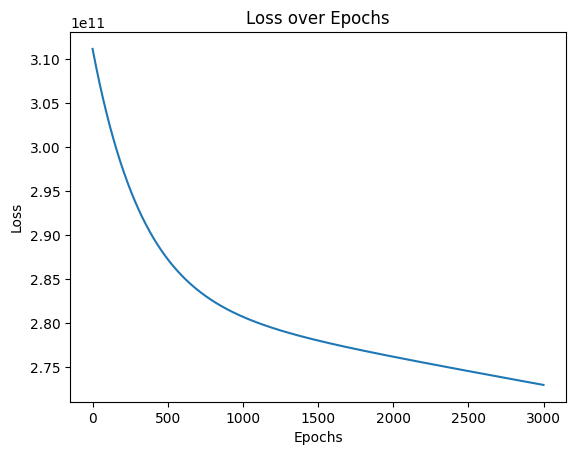

Giá dự đoán: [63004.53540116]


In [ ]:
# Huấn luyện KHÔNG sử dụng chuẩn hóa
import numpy as np
import matplotlib.pyplot as plt

# ---------- Chuẩn hóa ----------
def add_bias(X):
    # thêm cột 1 ở đầu cho bias (w0)
    return np.c_[np.ones((X.shape[0], 1)), X]

def standardize(X):
    # chuẩn hoá Z-score: (x - mean)/std
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    sigma[sigma == 0.0] = 1.0  # tránh chia 0
    return (X - mu) / sigma, mu, sigma

def loss_mse(Xb, y, w):
    N = len(y)
    y_pred = Xb @ w
    return np.sum((y_pred - y) ** 2) / (2 * N)

def gradientDescent_multi(X, y, lr=0.01, epochs=2000):
    # chuẩn hoá feature để dễ hội tụ
    # Xn, mu, sigma = standardize(X)
    # Xb = add_bias(Xn)                   #(N, d+1)

    Xb = add_bias(X)
    N, d1 = Xb.shape

    # khởi tạo w
    w = np.zeros(d1)
    losses = []

    for _ in range(epochs):
        y_pred = Xb @ w
        grad = (Xb.T @ (y_pred - y)) / N   #gradient
        w -= lr * grad
        losses.append(loss_mse(Xb, y, w))

    return w, losses
"""
    Khai tác dữ liệu từ file csv
"""
import pandas as pd

df = pd.read_csv(r"D:\Scr-AIR\Buoi1\data.csv")

#lượt bỏ date và các thông tin có dạng text 
X = df.drop(['price', 'date', 'street', 'city', 'statezip', 'country'], axis=1).to_numpy()
Y = df['price'].to_numpy()

# huấn luyện
w, losses = gradientDescent_multi(X, Y, lr=10e-13, epochs=3000)
print('w =', w)

# vẽ đồ thị hàm mất mát
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()


# Mẫu dự đoán giá nhà
# X_new = np.array([[3, 1.5, 1340, 7912,  1.5, 0, 0, 3, 1340, 0, 1955, 2005]])
# X_new_b = np.c_[np.ones((1,1)), X_new]   # thêm bias = 1
# grads = X_new_b @ w
# print("Giá dự đoán:", grads)
